In [57]:
import sys, os
import json, pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import time as pytime
import statsmodels.tsa.stattools as tsa
import ruptures as rpt
sys.path.append('../..')
import InsanallyLabEphysTools as ilep
from scipy.stats import gaussian_kde, sem, ttest_ind, ttest_rel, norm, mannwhitneyu, linregress, wilcoxon
from tqdm import tqdm
from types import SimpleNamespace
from sklearn import linear_model
from sklearn.model_selection import KFold
import seaborn as sns
import traceback
from itertools import product

plt.rcParams['legend.fontsize'] = 'small'
plt.rcParams['axes.labelsize'] = 'medium'
plt.rcParams['axes.formatter.limits'] = [-2,3]
plt.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.dpi'] = '150'

#Set global font parameters
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
#Set font type to TrueType for compatibility
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

TARGET_COLOR = '#ff3654'
NONTARGET_COLOR = '#5776ff'

CR_COLOR = '#808080'
NCR_COLOR = '#FF767C'
CNO_COLOR = '#00BFFF'
SWITCH_COLOR = '#B07A3B'
LASER_COLOR = '#3375E9'
GOOD_GREY = '#969696'
GOOD_GREEN = '#32A852'
NCR_COLOR_DESAT = '#D98C90'
CR_COLOR_DESAT = '#A0A0A0'
NCR_CR_cmap = mpl.colors.LinearSegmentedColormap.from_list('NCR-CR color map', [NCR_COLOR, CR_COLOR], N=1000)
PHASE_COLORS = ['#DEB9E0','#B78AB9','#906D92','#ABC5E8','#869BB7','#5E6C80']#,'#6ded94','#50d979','#36bf5f']

#dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_61','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']
# dualanimalnames = ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']

animals = ['TH_203']

#act_directory = 'D:\\Analysis_Cache_archived_Oct_27_2022'
act_directory = 'D:\\Analysis_Cache'
ops_directory = 'D:\\Opsin_Cache'
beh_directory = 'P:\\Behavioor'

In [58]:
def get_response_times_with_default(sessionfile):
    response_times_in_trial = (sessionfile.trials.response-sessionfile.trials.starts)
    default_response_time = np.nanmedian(response_times_in_trial)

    response_times = sessionfile.trials.response
    nogo_trials = np.isnan(response_times)
    response_times[nogo_trials] = sessionfile.trials.starts[nogo_trials]+default_response_time
    return response_times

In [76]:
EnumSession2 = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
    if sessionfile.meta.animal not in ['TH_234']:
        continue
    print(sessionfile.meta.day_of_training)
    
    if sessionfile.meta.region != 'AC':
        continue
    
#     if sessionfile.meta.animal not in animals:
#         continue
    
    for clust in sessionfile.clusters.good:
        EnumSession2.append(session)

100%|██████████| 723/723 [00:08<00:00, 82.33it/s] 

5
6
7
8


In [77]:
print(len(EnumSession2))

192


In [108]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
#     if session not in ['TH_233_3_passive_AC.pickle','TH_233_4_passive_AC.pickle']:
#         continue
#     if session not in ['TH_230_1_passive_AC.pickle','TH_230_2_passive_AC.pickle','TH_234_1_passive_AC.pickle']:
#         continue
        
    if session != 'TH_234_3_passive_AC.pickle':# and clust in [109,40]:
        continue
        
    print(sessionfile.meta.day_of_training)
    
    if sessionfile.meta.region != 'AC':
        continue
    
#     if sessionfile.meta.animal not in animals:
#         continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 723/723 [00:08<00:00, 83.45it/s] 

7


In [109]:
EnumSession

['TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234_3_passive_AC.pickle',
 'TH_234

In [60]:
### Reset raster directory

os.mkdir(os.path.join('D:\\\\TempFigures','PassiveRasters','pngs'))
os.mkdir(os.path.join('D:\\\\TempFigures','PassiveRasters','pdfs'))
for modcat in ['CR','NCR','Middle']:
    os.mkdir(os.path.join('D:\\\\TempFigures','PassiveRasters',modcat))
    os.mkdir(os.path.join('D:\\\\TempFigures','PassiveRasters',modcat,'pdfs'))
    os.mkdir(os.path.join('D:\\\\TempFigures','PassiveRasters',modcat,'pngs'))

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'D:\\\\TempFigures\\PassiveRasters\\pngs'

In [110]:
def visualizeClusterInternal(sessionfile,clust,ax1,ax2):
    bw_scott_factor = 3

    response_times = get_response_times_with_default(sessionfile)
    
    ax1.spines['bottom'].set_visible(False)
    ax1.spines['left'].set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)

    #FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    FRmod_CR_NCR_threshold = 3.5
    Ramping_CR_NCR_threshold = 5.72
    
#     FRmod_color = NCR_CR_cmap( (FRmod-1)/5)
#     FRmod_color = NCR_CR_cmap( (FRmod-1)/5)
    mn = 3.5
    spread = 2
    Y = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    if np.isnan(Y):
        color_to_use = 'k'
    else:
        color_to_use = NCR_CR_cmap( (Y-(mn-spread/2))/ (spread) )

    #Sort trials by response time
    allConditions = ilep.getAllConditions(sessionfile,clust,trialsPerDayLoaded='NO_TRIM')
    trialsToPlot = allConditions['all_trials'].trials
    ### If reordering trials, do it here
    
    ### End trial reordering

    clustSpikes = ilep.getSpikeTimes(sessionfile,clust=clust)
    trialSpikes = []
    for trial in trialsToPlot:

        #Need to get spike times for each trial...
        starttime = sessionfile.trials.starts[trial] - 0.75*sessionfile.meta.fs
        endtime = sessionfile.trials.starts[trial] + 2.75*sessionfile.meta.fs
#         starttime = response_times[trial]-2.75*sessionfile.meta.fs
#         endtime = response_times[trial]+0.75*sessionfile.meta.fs
        
        this_trial_spikes = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=starttime,endtime=endtime)
        this_trial_spikes = this_trial_spikes - sessionfile.trials.starts[trial]#response_times[trial]
        this_trial_spikes = this_trial_spikes * 1000 / sessionfile.meta.fs

        trialSpikes.append(this_trial_spikes)
    trialSpikes = np.array(trialSpikes,dtype='object')

    #Plot Raster
    for idx,trial in enumerate(trialsToPlot):
        ax1.scatter(trialSpikes[idx],np.ones_like(trialSpikes[idx])*idx,color=color_to_use,s=1.5,marker='o',lw=0)

        trialend = response_times[trial]
        trialstart = sessionfile.trials.starts[trial]
        trial_duration = trialend-trialstart
        trial_duration = trial_duration * 1000 / 30000

        
    ###################################################
    
#     ### Plot stimulus times
#     stimulus_times = -response_times_trimmed
#     ax1.scatter(stimulus_times,range(len(trialsToPlot)),marker='o',fc='k',ec='k',zorder=-1,s=1.5,label='stimulus')
    
#     ### Plot response times
#     go_trials = new_go_trials_idx_list
#     ax1.scatter(np.zeros_like(go_trials),go_trials,marker='o',fc='g',ec='g',zorder=-1,s=1.5,label='response')
    
    ###################################################
    
    #ax1.fill_betweenx(range(len(trialsToPlot)),-response_times_trimmed_sorted,100-response_times_trimmed_sorted,alpha=0.125,color='k',lw=0,label='stimulus')
    
    #ax1.axvline(0,lw=2.5,color='green',label='Response')
    lgd = ax1.legend(frameon=False,loc=(0.6,1))

    #if EIL == 'switch':
    #    try:
    #        switch_point = np.where(np.greater(trialsToPlot,200))[0][0]-0.5
    #        ax1.axhline(switch_point,linestyle='--',lw=1,zorder=-10,color='k')
    #    except:
    #        pass

    #Plot PSTH
    starttime = -500
    endtime = 2500
    PSTHstart = starttime - 500
    PSTHend = endtime + 500
    xrange = np.linspace(starttime,endtime,num=1000)
    numSplits = min(10,len(trialSpikes))
    if numSplits < 2:
        return False,[] ### Return a failure
    FR = np.full((numSplits,len(xrange)),np.nan)
    kf = KFold(n_splits=numSplits)
    for idx,(train_index,_) in enumerate(kf.split(trialSpikes)):
        PSTHspikes = np.concatenate(trialSpikes[train_index])
        if len(PSTHspikes) == 0:
            FR[idx,:] = np.zeros(len(xrange))
            continue
        bw = len(PSTHspikes)**(-1./5) / bw_scott_factor
        KDE = gaussian_kde(PSTHspikes,bw_method=bw)
        FR[idx,:] = KDE.evaluate(xrange)
        FR[idx,:] = FR[idx,:] * len(PSTHspikes) / len(train_index) * 1000 #1000 is conversion to s/s because units are all in ms for this plot
    avg_FR = np.mean(FR,axis=0)
    sem_FR = np.std(FR,axis=0)

    ax2.plot(xrange,avg_FR,lw=1,color=color_to_use)
    ax2.fill_between(xrange,avg_FR-sem_FR,avg_FR+sem_FR,color=color_to_use,alpha=0.5,zorder=-10,lw=0)

    max_FR_value = np.max(avg_FR+sem_FR) * 1.1
    sequence_of_possible_axis_limits = np.array([1,2,4,6,8,10,12,16,20,30,40,50,60,80,100,120,140,150,160,180,200])
    idx_of_okay_limits = np.greater_equal(sequence_of_possible_axis_limits,max_FR_value)
    valid_limits = sequence_of_possible_axis_limits[idx_of_okay_limits]
    limit = np.min(valid_limits)
    ax2.set_ylim([0,limit])
    ax2.set_yticks([0,limit/2,limit])
    ax2.set_yticklabels(['0',str(int(limit/2)),str(limit)])
    ylab = ax2.set_ylabel('Firing rate (spikes/s)')

    #ax2.plot([0,100],[limit,limit],color='k',lw=3,linestyle='-',zorder=10)

    ax2.set_xlim([starttime,endtime])
    ax2.set_xlim([-50,150])
#     ax2.set_xlim([-50,150])
    #ax2.set_xticks([0,500,1000,1500])
    #ax2.set_xticklabels(['0','0.5','1','1.5'])
#     #ax2.set_xticks([-0,-500,-1000,-1500,-2000,-2500])
#     ax2.set_xticks([-500,-250,0,250,500])
#     ax2.set_xticklabels(['-0.5','-0.25','0','0.25','0.5'])
#     ax2.set_xlim([-50,150])
#     ax2.set_xticks([-50,-25,0,25,50,75,100,125,150])
#     ax2.set_xticklabels(['-50','-25','0','25','50','75','100','125','150'])
    xlab = ax2.set_xlabel('Time relative to response (ms)')
    
    ax1.axvline(10,lw=0.5)
    ax1.axvline(20,lw=0.5)
    
    ################################################################
    
    ax1.fill_between([0,100],[ax1.get_ylim()[0]]*2,[ax1.get_ylim()[1]]*2,color='grey',lw=0,alpha=0.2)
    
    artists = [lgd,ylab,xlab]
    
    return True,artists

0it [00:00, ?it/s]C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
6it [00:10,  1.72s/it]C:\Users\insan\anaconda3\envs\EphysPlotting\lib\site-packages\numpy\lib\nanfunctions.py:1119: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,
63it [00:25,  2.47it/s]


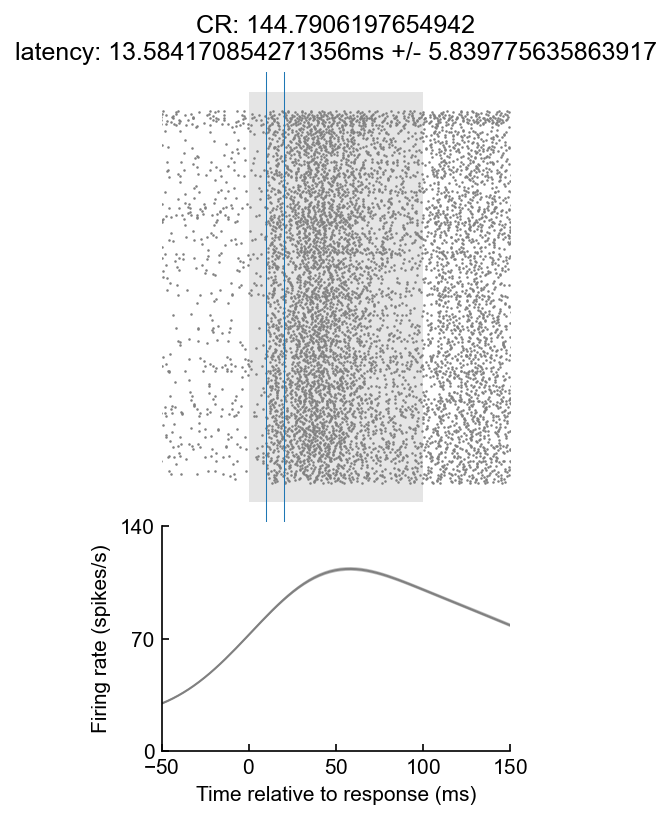

In [119]:
for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    
#     if clust not in [38,80,5]:
#         continue
    if clust not in [109,40]:
        continue
    
    plt.close('all')
    sessionfile = ilep.loadSessionCached(act_directory,session)
    
#     if sessionfile.meta.day_of_training > 4:
#         continue
    
    fig = plt.figure(figsize=(3,6))
    gs = fig.add_gridspec(2,1,height_ratios=[2,1],hspace=0.0125)#,wspace=0.5)#0.1)
#     ax1 = plt.subplot(gs[0,0])#Raster
#     ax2 = plt.subplot(gs[1,0],sharex=ax1)#PSTH
    
    ax3 = plt.subplot(gs[0,0])#Raster
    ax4 = plt.subplot(gs[1,0],sharex=ax3)#PSTH
    
    #visualizeClusterInternal(sessionfile,clust,ax1,ax2)
    success,artists = visualizeClusterInternal(sessionfile,clust,ax3,ax4)
    if not success:
        continue
    
#     ax3.set_title(f"{session} clust {clust}\nFRmodc_go={np.around(sessionfile.responsiveness[clust]['go'].FRmodulation_choice,2)}, FRmodc_nogo={np.around(sessionfile.responsiveness[clust]['nogo'].FRmodulation_choice,2)}",fontsize=8)
    
    #Determine FRmod category
    FRmodCategory = 'ERROR'
    FRmod = sessionfile.responsiveness[clust]['all_trials'].FRmodulation
    if FRmod < 1:
        FRmodCategory = 'NCR'
    elif FRmod > 5:
        FRmodCategory = 'CR'
    else:
        FRmodCategory = 'Middle'
    #Skip unidentified category neurons
    if FRmodCategory in ['ERROR','nan',np.nan]:
        continue

    region = sessionfile.meta.region
    
    latency,lstd = calculateOnsetLatency(sessionfile,clust)
    
    if FRmod >= 3.5:
        ax3.set_title(f"CR: {FRmod}\nlatency: {latency}ms +/- {lstd}")
    else:
        ax3.set_title(f"NCR: {FRmod}\nlatency: {latency}ms +/- {lstd}")
    
#     break
        
    try:
        if not FRmodCategory == 'ERROR':
            fig.savefig(os.path.join('D:\\\\TempFigures','PassiveRasters',FRmodCategory,'pdfs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
            fig.savefig(os.path.join('D:\\\\TempFigures','PassiveRasters',FRmodCategory,'pngs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.png'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
        fig.savefig(os.path.join('D:\\\\TempFigures','PassiveRasters','pdfs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.pdf'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
        fig.savefig(os.path.join('D:\\\\TempFigures','PassiveRasters','pngs',ilep.generateDateString(sessionfile)+' '+str(clust)+'.png'),transparent=False,facecolor="white",dpi=400, bbox_extra_artists=(artists), bbox_inches='tight')
    except Exception as e:
        print(e)

In [118]:
def calculateOnsetLatency(sessionfile,clust):
    latency = []
    allConditions = ilep.getAllConditions(sessionfile,clust,trialsPerDayLoaded='NO_TRIM')
    for trial in allConditions['all_trials'].trials:
        starttime = sessionfile.trials.starts[trial]
        endtime = sessionfile.trials.starts[trial] + 0.1*sessionfile.meta.fs
        spike_times = ilep.getSpikeTimes(sessionfile,clust=clust,starttime=starttime,endtime=endtime)
        if len(spike_times) > 0:
            latency.append( (np.min(spike_times) - starttime)*1000/sessionfile.meta.fs )
    return np.mean(latency), np.std(latency)

In [47]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)

    if sessionfile.meta.region != 'AC':
        continue
    
    if sessionfile.meta.animal not in ['TH_201','TH_203','LA_204','LA_205','TH_200', 'TH_230','AE_229','TH_233','TH_234']:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 723/723 [00:07<00:00, 102.66it/s]


In [48]:
FR_passive = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    FR_passive.append(sessionfile.responsiveness[clust]['all_trials'].FRbaseline)

1442it [00:10, 136.13it/s]


In [44]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)

    if sessionfile.meta.region != 'AC':
        continue
    
    if sessionfile.meta.animal not in ['TH_203']:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 723/723 [00:07<00:00, 100.94it/s]


In [46]:
FR_203 = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    FR_203.append(sessionfile.responsiveness[clust]['all_trials'].FRbaseline)

134it [00:00, 186.84it/s]


In [36]:
EnumSession = []
EnumClust = []
sessions = os.listdir(act_directory)
for session in tqdm(sessions):
    sessionfile = ilep.loadSessionCached(act_directory,session)

    if sessionfile.meta.region != 'AC':
        continue
    
    if sessionfile.meta.animal not in ['BS_40','BS_41','BS_42','BS_49','BS_50','BS_51','BS_56','BS_59','BS_67','BS_70','BS_72','BS_87','BS_108','DS_15','DS_19']:
        continue
    
    for clust in sessionfile.clusters.good:
        EnumSession.append(session)
        EnumClust.append(clust)

100%|██████████| 723/723 [00:07<00:00, 101.64it/s]


In [37]:
FR_active = []

for idx,(session,clust) in tqdm(enumerate(zip(EnumSession,EnumClust))):
    sessionfile = ilep.loadSessionCached(act_directory,session)
    FR_active.append(sessionfile.responsiveness[clust]['all_trials'].FRbaseline)

1830it [00:13, 136.01it/s]


1.9849246231155782


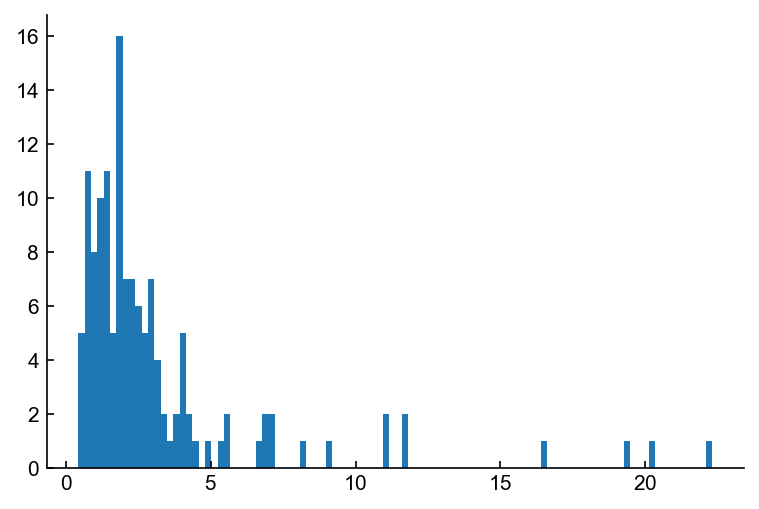

In [54]:
plt.hist(FR_203,bins=100)
print(np.nanmedian(FR_203))
pass

2.218803418803419


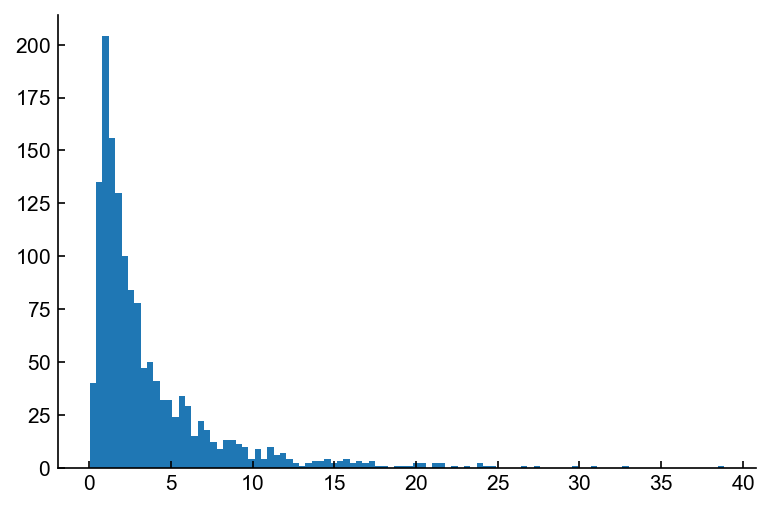

In [55]:
plt.hist(FR_passive,bins=100)
print(np.nanmedian(FR_passive))
pass

2.7598413182789137


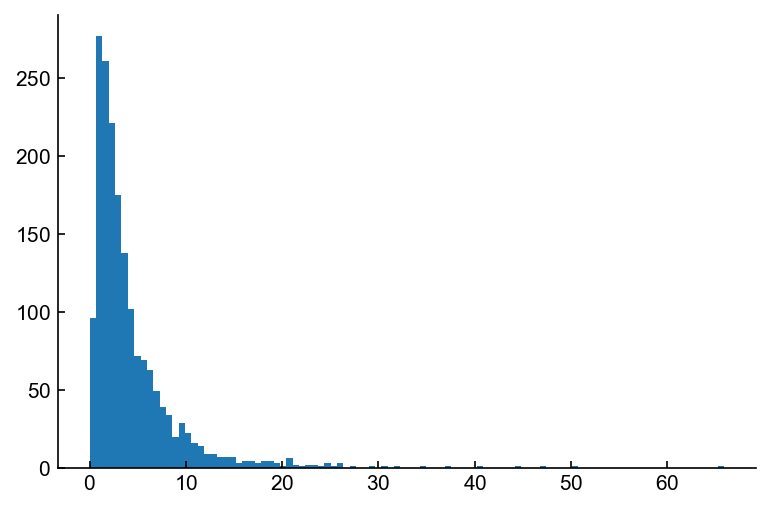

In [56]:
plt.hist(FR_active,bins=100)
print(np.nanmedian(FR_active))
pass